# ブロードキャストとufunc関数

ufuncはuniversal functionの略で、配列の各要素に対して演算を行う関数です。NumPyに組み込まれている多くのufunc関数はC言語で実装されているため、計算速度が非常に速いです。まずは例を見てみましょう：

In [9]:
import helper.magics
import numpy as np

x = np.linspace(0, 2 * np.pi, 10)
y = np.sin(x)
y

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

まず`linspace()`を使用して、$0$から$2 \pi$までの等間隔の配列を生成し、それを`np.sin()`に渡して各要素の正弦値を計算します。`np.sin()`はufunc関数であるため、内部で配列`x`の各要素に対してループを行い、それぞれの正弦値を計算し、その結果を保存した配列を返します。演算後、配列`x`の値は変更されず、新しい配列が作成されて結果が保存されます。また、`out`パラメータを使用して計算結果を保存する配列を指定することもできます。したがって、配列`x`に直接結果を保存したい場合は、`out`パラメータに渡すことができます：

In [10]:
t = np.sin(x, out=x)
t is x

True

ufunc関数の戻り値は依然として計算結果ですが、それは配列`x`そのものです。`np.sin()`は単一の数値の正弦値も計算できます。ただし、単一の数値の計算において、`np.sin()`は標準ライブラリ`math`の`sin()`よりもかなり遅いことに注意してください。これは、`np.sin()`が配列と単一の数値の両方の計算をサポートするために、C言語の内部実装が`math.sin()`よりも複雑であるためです。また、単一の数値の計算において、`np.sin()`の戻り値の型は`math.sin()`とは異なり、`math.sin()`はPythonの標準的なfloat型を返しますが、`np.sin()`はfloat64型を返します：

In [11]:
import math

%C type(math.sin(0.5)); type(np.sin(0.5))

type(math.sin(0.5))  type(np.sin(0.5))
-------------------  -----------------
float                numpy.float64    


## 四則演算

NumPyは多くのufunc関数を提供しており、例えば2つの配列の和を計算する`add()`関数があります：

In [12]:
a = np.arange(0, 4)
b = np.arange(1, 5)
np.add(a, b)

array([1, 3, 5, 7])

`add()`は、2つの引数配列の対応する要素の和を要素とする配列を返します。`out`パラメータが指定されていない場合、新しい配列が作成されて計算結果が保存されます。`out`パラメータが指定されている場合、新しい配列は作成されず、指定された配列に直接結果が保存されます。

In [13]:
np.add(a, b, a)
a

array([1, 3, 5, 7])

NumPyは配列に対してさまざまな数学演算子を定義しているため、2つの配列の加算は単に`a + b`と書くことができ、`np.add(a, b, a)`は`a += b`と表すことができます。次のテーブルには、配列の演算子とそれに対応するufunc関数がリストされています。

| 式        |  対応するufunc関数      |
|-------------|:-------------------|
|`y = x1 + x2`  |  `add(x1, x2 [, y])` |
|`y = x1 - x2`  |  `subtract(x1, x2 [, y])` |
|`y = x1 * x2`|`multiply(x1, x2 [, y])`|
|`y = x1 / x2`|    `divide(x1, x2 [, y])`|
|`y = x1 // x2`|   `floor_divide(x1, x2 [, y])`|
|`y = -x`      |   `negative(x [,y])`|
|`y = x1**x2`  |   `power(x1, x2 [, y])`|
|`y = x1 % x2` |   `remainder(x1, x2 [, y])`, `mod(x1, x2, [, y])`|

配列オブジェクトは演算子をサポートしており、式の記述が大幅に簡素化されますが、式が複雑で演算対象の配列が大きい場合、多くの中間結果が生成されるため、プログラムの実行速度が低下する可能性があることに注意してください。例えば、`a`、`b`、`c`の3つの配列に対して`x=a*b+c`という式を計算する場合、以下のようになります：

```python
t = a * b
x = t + c
del t
```

つまり、乗算の結果を保存するための一時的な配列`t`が生成され、その後最終的な結果配列`x`が生成されます。メモリ割り当てを1回減らすために、以下の2行に分解することができます：

```python
x = a*b
x += c
```

## 比較演算と論理演算

`==`、`>`などの比較演算子を使用して2つの配列を比較すると、各要素の比較結果を要素とするブール配列が返されます。例えば：

In [14]:
np.array([1, 2, 3]) < np.array([3, 2, 1])

array([ True, False, False])

各比較演算子も対応するufunc関数を持ちます。次のテーブルは比較演算子とそれに対応するufunc関数の対照表です。

| 式        |  対応するufunc関数      |
|-------------|:-------------------|
|`y = x1 == x2`|   `equal(x1, x2 [, y]) `|
|`y = x1 != x2`|   `not_equal(x1, x2 [, y])`|
|`y = x1 < x2 `|   `less(x1, x2, [, y]) `|
|`y = x1 <= x2`|   `less_equal(x1, x2, [, y])`|
|`y = x1 > x2 `|   `greater(x1, x2, [, y])`|
|`y = x1 >= x2`|   `greater_equal(x1, x2, [, y])`|

Pythonの論理演算では`and`、`or`、`not`などのキーワードを使用しますが、これらはオーバーロードできないため、配列の論理演算は対応するufunc関数を使用して行う必要があります。これらの関数名は`logical_`で始まり、`logical_and`、`np.logical_not`、`logical_or`、`logical_xor`はそれぞれ論理積、論理否定、論理和、排他的論理和を表します。以下は`logical_or()`の使用例です：

In [15]:
a = np.arange(5)
b = np.arange(4, -1, -1)
print(a == b)
print(a > b)
print(np.logical_or(a == b, a > b))  # a>=b と同じ

[False False  True False False]
[False False False  True  True]
[False False  True  True  True]


2つのブール配列に対して`and`、`or`、`not`などのキーワードを使用して論理演算を行うと、`ValueError`例外が発生します。ブール配列には`True`と`False`が混在しているため、NumPyはユーザーの意図を判断できません：

In [16]:
try:
    a == b and a > b
except Exception as ex:
    print(ex)

The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


エラーメッセージは、配列の`any()`または`all()`メソッドを使用できることを示しています。NumPyでは`any()`と`all()`関数も定義されており、その使い方はPythonの組み込み`any()`と`all()`と似ています。配列内に1つでも`True`があれば`any()`は`True`を返し、配列のすべての要素が`True`の場合にのみ`all()`は`True`を返します。

In [17]:
%C np.any(a == b); np.any(a == b) and np.any(a > b)

np.any(a == b)  np.any(a == b) and np.any(a > b)
--------------  --------------------------------
np.True_        np.True_                        


`bitwise_`で始まる関数はビット演算関数で、`bitwise_and`、`bitwise_not`、`bitwise_or`、`bitwise_xor`などがあります。また、`&`、`~`、`|`、`^`などの演算子を使用して計算することもできます。
    
ブール配列の場合、ビット演算と論理演算の結果は同じです。ただし、ビット演算子の優先順位は比較演算子よりも高いため、比較演算の優先順位を上げるために括弧を使用する必要があります。例えば：

In [18]:
(a == b) | (a > b)

array([False, False,  True,  True,  True])

整数配列のビット演算はC言語のビット演算と同じです。使用時には要素の型の符号に注意してください。例えば、以下の`arange()`で作成された配列の要素型は32ビット符号付き整数であるため、正数のビット反転を行うと負数が得られます。整数0を例にとると、ビット反転の結果は`0xFFFFFFFF`であり、32ビット符号付き整数ではこの値は-1を表します。

In [19]:
~np.arange(5)

array([-1, -2, -3, -4, -5])

8ビット符号なし整数配列に対してビット反転演算を行う場合：

In [20]:
~np.arange(5, dtype=np.uint8)

array([255, 254, 253, 252, 251], dtype=uint8)

同じ整数0でも、ビット反転の結果は`0xFF`であり、8ビット符号なし整数の場合、その値は255です。

## ブロードキャスト

ufunc関数を使用して2つの配列を計算する場合、ufunc関数はこれらの配列の対応する要素に対して計算を行うため、これらの配列の形状が同じである必要があります。形状が異なる場合、以下のブロードキャスト（broadcasting）処理が行われます：

① すべての入力配列を、最も次元の多い配列に合わせます。`shape`属性の不足部分は、前に1を追加して補います。

② 出力配列の`shape`属性は、入力配列の`shape`属性の各軸の最大値です。

③ 入力配列の特定の軸の長さが1であるか、出力配列の対応する軸の長さと同じである場合、その配列は計算に使用できます。それ以外の場合はエラーになります。

④ 入力配列の特定の軸の長さが1である場合、その軸に沿った演算ではその軸の最初の値が使用されます。

上記の4つのルールは理解しにくいかもしれませんので、実際の例を見てみましょう。

まず、形状が`(6, 1)`の2次元配列`a`を作成します：

In [21]:
a = np.arange(0, 60, 10).reshape(-1, 1)
%C a; a.shape

  a     a.shape
------  -------
[[ 0],  (6, 1) 
 [10],         
 [20],         
 [30],         
 [40],         
 [50]]         


次に、形状が`(5,)`の1次元配列`b`を作成します：

In [22]:
b = np.arange(0, 5)
%C b; b.shape

       b         b.shape
---------------  -------
[0, 1, 2, 3, 4]  (5,)   


`a`と`b`の和を計算し、加算表を取得します。これは、2つの配列のすべての要素のペアの和を計算し、形状が`(6, 5)`の配列を取得することに相当します：

In [23]:
c = a + b
%C c; c.shape

          c             c.shape
----------------------  -------
[[ 0,  1,  2,  3,  4],  (6, 5) 
 [10, 11, 12, 13, 14],         
 [20, 21, 22, 23, 24],         
 [30, 31, 32, 33, 34],         
 [40, 41, 42, 43, 44],         
 [50, 51, 52, 53, 54]]         


`a`と`b`の次元が異なるため、ルール①に従って、`b`の`shape`属性を`a`に合わせる必要があります。そのため、`b`の`shape`属性の前に1を追加して`(1, 5)`に補います。これは以下の計算に相当します：

In [24]:
b.shape = 1, 5
%C b; b.shape

        b          b.shape
-----------------  -------
[[0, 1, 2, 3, 4]]  (1, 5) 


このように、加算演算の2つの入力配列の`shape`属性はそれぞれ`(6, 1)`と`(1, 5)`であり、規則②に従って、出力配列の各軸の長さは入力配列の各軸の長さの最大値となるため、出力配列の`shape`属性は`(6, 5)`となります。

`b`の第0軸の長さが1であり、`a`の第0軸の長さが6であるため、それらを第0軸で加算できるようにするには、`b`の第0軸の長さを6に拡張する必要があります。これは次のように相当します：

In [25]:
b = b.repeat(6, axis=0)
%C b; b.shape

        b          b.shape
-----------------  -------
[[0, 1, 2, 3, 4],  (6, 5) 
 [0, 1, 2, 3, 4],         
 [0, 1, 2, 3, 4],         
 [0, 1, 2, 3, 4],         
 [0, 1, 2, 3, 4],         
 [0, 1, 2, 3, 4]]         


`repeat()`メソッドは、`axis`パラメータで指定された軸に沿って配列の各要素の値を複製します。`a`の第1軸の長さが1であり、`b`の第1軸の長さが5であるため、それらを第1軸で加算できるようにするには、`a`の第1軸の長さを5に拡張する必要があります。これは次のように相当します：

In [26]:
a = a.repeat(5, axis=1)
%C a; a.shape

          a             a.shape
----------------------  -------
[[ 0,  0,  0,  0,  0],  (6, 5) 
 [10, 10, 10, 10, 10],         
 [20, 20, 20, 20, 20],         
 [30, 30, 30, 30, 30],         
 [40, 40, 40, 40, 40],         
 [50, 50, 50, 50, 50]]         


上記の処理を行った後、`a`と`b`は対応する要素ごとに加算演算を行うことができます。もちろん、`a + b`演算を実行する際、NumPy内部では実際には長さ1の軸を`repeat()`で拡張することはありません。これはメモリ空間を無駄に消費するためです。

NumPyは、`broadcast_to()`と`broadcast_arrays()`という2つの関数を提供しており、これらを使用して配列をブロードキャスト処理します。`broadcast_to()`はブロードキャストアルゴリズムを使用して配列を指定された形状に変換し、`broadcast_arrays()`は複数の配列をブロードキャスト処理した後の新しい配列を返します。これらの関数が返す配列は、元の配列とデータストレージ領域を共有しています。

In [27]:
a = np.arange(0, 60, 10).reshape(-1, 1)
b = np.arange(0, 5)
a2, b2 = np.broadcast_arrays(a, b)
b3 = np.broadcast_to(b, (2, 3, 5))
%C a2.shape; b2.shape; b3.shape

a2.shape  b2.shape   b3.shape
--------  --------  ---------
(6, 5)    (6, 5)    (2, 3, 5)


ブロードキャスト計算は非常に一般的であるため、NumPyは`ogrid`オブジェクトを提供しており、ブロードキャスト演算用の配列を作成するために使用されます：

In [28]:
x, y = np.ogrid[:5, :5]
%C x; y

  x            y        
-----  -----------------
[[0],  [[0, 1, 2, 3, 4]]
 [1],                   
 [2],                   
 [3],                   
 [4]]                   


さらに、NumPyは`mgrid`オブジェクトも提供しており、その使用方法は`ogrid`オブジェクトと似ていますが、ブロードキャスト後の配列を返します：

In [29]:
x, y = np.mgrid[:5, :5]
%C x; y

        x                  y        
-----------------  -----------------
[[0, 0, 0, 0, 0],  [[0, 1, 2, 3, 4],
 [1, 1, 1, 1, 1],   [0, 1, 2, 3, 4],
 [2, 2, 2, 2, 2],   [0, 1, 2, 3, 4],
 [3, 3, 3, 3, 3],   [0, 1, 2, 3, 4],
 [4, 4, 4, 4, 4]]   [0, 1, 2, 3, 4]]


`ogrid`は非常に興味深いオブジェクトで、多次元配列のようにスライスのタプルをインデックスとして使用し、ブロードキャスト計算に使用できる配列のセットを返します。そのスライスインデックスには2つの形式があります：

* `開始値:終了値:ステップ`、これは`np.arange(開始値, 終了値, ステップ)`と似ています。

* `開始値:終了値:長さj`、3番目のパラメータが虚数の場合、返される配列の長さを表し、`np.linspace(開始値, 終了値, 長さ)`と似ています。

In [30]:
x, y = np.ogrid[:1:4j, :1:3j]
%C x; y

      x                 y        
--------------  -----------------
[[0.        ],  [[0. , 0.5, 1. ]]
 [0.33333333],                   
 [0.66666667],                   
 [1.        ]]                   


`ogrid`の戻り値を利用することで、等間隔グリッド上の二変数関数の値を簡単に計算できます。以下は、3次元曲面$f(x,y) = x e^{x^2-y^2}$を計算するプログラムです：

In [31]:
x, y = np.ogrid[-2:2:20j, -2:2:20j]
z = x * np.exp(-(x**2) - y**2)

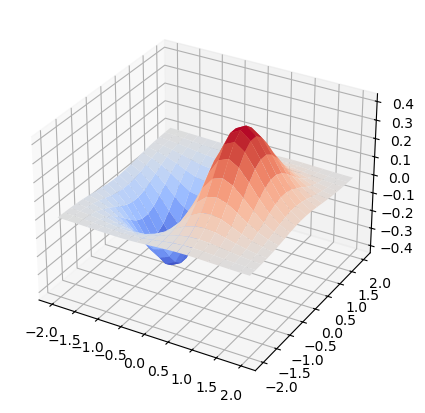

In [32]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1, projection="3d")
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap="coolwarm", linewidth=0.2)

ufunc関数のブロードキャスト機能を最大限に活用するため、配列の形状を調整することがよくあります。そのため、配列は特殊なインデックスオブジェクト`None`をサポートしており、`None`に対応する位置に長さ1の新しい軸を作成します。例えば、1次元配列`a`の場合、`a[None, :]`は`a.reshape(1, -1)`と同等であり、`a[:, None]`は`a.reshape(-1, 1)`と同等です：

In [33]:
a = np.arange(4)
%C a[None, :]; a[:, None]

  a[None, :]    a[:, None]
--------------  ----------
[[0, 1, 2, 3]]  [[0],     
                 [1],     
                 [2],     
                 [3]]     


以下の例では、`None`をインデックスとして使用して、ブロードキャスト演算を実現しています：

In [34]:
x = np.array([0, 1, 4, 10])
y = np.array([2, 3, 8])
x[None, :] + y[:, None]

array([[ 2,  3,  6, 12],
       [ 3,  4,  7, 13],
       [ 8,  9, 12, 18]])

また、`ix_()`を使用して、2つの1次元配列をブロードキャスト可能な2次元配列に変換することもできます：

In [35]:
gy, gx = np.ix_(y, x)
%C gx; gy; gx + gy

        gx            gy        gx + gy      
------------------  -----  ------------------
[[ 0,  1,  4, 10]]  [[2],  [[ 2,  3,  6, 12],
                     [3],   [ 3,  4,  7, 13],
                     [8]]   [ 8,  9, 12, 18]]


上記の例では、`ix_()`を使用して配列`x`と`y`をブロードキャスト演算可能な2次元配列に変換しています。配列`y`はブロードキャスト演算結果の第0軸に対応し、配列`x`は第1軸に対応します。`ix_()`のパラメータはN個の1次元配列であり、これらの配列をN次元空間でブロードキャスト可能なN次元配列に変換します。

## ufuncのメソッド

`ufunc`関数オブジェクト自体にもいくつかのメソッド関数があり、これらのメソッドは2つの入力と1つの出力を持つ`ufunc`関数に対してのみ有効です。他の`ufunc`オブジェクトがこれらのメソッドを呼び出すと、`ValueError`例外が発生します。

`reduce()`メソッドの呼び出し形式は`<op>.reduce(array, axis=0, dtype=None)`です。これは`axis`パラメータで指定された軸に沿って配列を操作し、`<op>`演算子を`axis`軸に沿ったすべての要素の間に挿入するのと同等です。例えば：

In [36]:
r1 = np.add.reduce([1, 2, 3])  # 1 + 2 + 3
r2 = np.add.reduce([[1, 2, 3], [4, 5, 6]], axis=1)  # (1+2+3),(4+5+6)
%C r1; r2

     r1         r2   
-----------  --------
np.int64(6)  [ 6, 15]


`accumulate()`メソッドは`reduce()`と似ていますが、返される配列は入力配列と同じ形状であり、すべての中間計算結果を保存します：

In [37]:
a1 = np.add.accumulate([1, 2, 3])
a2 = np.add.accumulate([[1, 2, 3], [4, 5, 6]], axis=1)
%C a1; a2

    a1           a2      
---------  --------------
[1, 3, 6]  [[ 1,  3,  6],
            [ 4,  9, 15]]


`outer()`メソッドは、2つの配列の各要素のペアに対して演算を行います。これは以下のプログラムと同等です：

```python
a.shape += (1,)*b.ndim
<op>(a,b)
a = a.squeeze()
```

ここで、`squeeze()`メソッドは配列aから長さ1の軸を取り除きます。例を見てみましょう：

In [38]:
np.multiply.outer([1, 2, 3, 4, 5], [2, 3, 4])

array([[ 2,  3,  4],
       [ 4,  6,  8],
       [ 6,  9, 12],
       [ 8, 12, 16],
       [10, 15, 20]])

`outer()`の計算結果は乗算表であることがわかります。これらの配列を同等のプログラムで段階的に計算すると、乗算表が最終的にブロードキャスト方式で計算されることがわかります。